**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from scipy import optimize
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

ChatGPT has been used in this project. The main use has been to create outlines for graphs and figures.

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
from exercise1 import ProductionEconomy

# Initializing econ as ProductionEconomyC class
econ = ProductionEconomy()

We use the fact that the consumer knows that the government runs a balanced budget. In the function c2 in ProductionEconomy we insert $T=\tau c_2$. We can then solve for $c_2$ algebragly. We also insert this expression in the function c1().

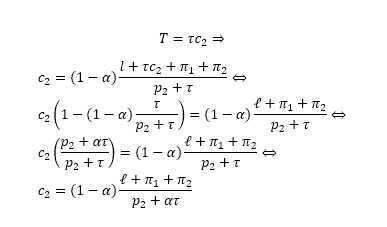

To solve question 1 we loop through all the combinations of $p_1$ and $p_2$ and store the market errors, we continue until we have found the prices which best clear the market.

In [3]:
# 1 Create p1 and p2 vector
p1_vec = np.linspace(0.1, 2.0, 10)
p2_vec = np.linspace(0.1, 2.0, 10)

# 2 Loop through p1 and p2 and append market errors to a list.
errors = [] # List to store errors
e1_best, e2_best, e3_best, p1_best, p2_best = 10, 10, 10, 10, 10 # Initial best

for p1 in p1_vec:
    for p2 in p2_vec:
        e1, e2, e3 = econ.check_market_clearing(p1, p2)
        errors.append((p1, p2, e1, e2, e3))

        # Finding the prices which lead to market equilibrium
        sum_error = np.abs(e1) + np.abs(e2) + np.abs(e3) # Expression for total market error
        if sum_error < np.abs(e1_best) + np.abs(e2_best) + np.abs(e3_best):
            e1_best, e2_best, e3_best = e1, e2, e3 # Save new smallest errors
            # Save prices which lead to lowest market error
            p1_best = p1
            p2_best = p2

print(f'p1_best = {p1_best:.3f} and p2_best = {p2_best:.3f}')

p1_best = 0.944 and p2_best = 1.578


The market clearing prices are $p_1^* = 0.944$ and $p_2^*=1.578$. We illustrate the market clearing conditions in the interactive graph below. Setting $p_2 = 1.55$ on the graph, we see that our market clearing prices aren't optimal as the market error is visibly lower at $p_2 = 1.5$, this is because we only look at limited combinations of the prices in our numerical solution.

In [4]:
# 3 Graph market errors as a function of p1 and p2
p2_slider = FloatSlider(value=1.55, min=0.1, max=2.0, step=0.05, description='p2')
interact(econ.plot_error, p2_cons = p2_slider)

interactive(children=(FloatSlider(value=1.55, description='p2', max=2.0, min=0.1, step=0.05), Output()), _dom_…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

We call the function market_equilibrium which minimizes the market error using an optimizer.

In [5]:
p1_opt, p2_opt = econ.market_equilibrium()

print(f'Market clearing prices:')
print(f'p1* = {p1_opt:.3f}\np2* = {p2_opt:.3f}')

Market clearing prices:
p1* = 0.976
p2* = 1.491


The market clearing prices are  $p_1^* = 0.976$ and $p_2^*=1.491$. This solution is much more accurate for clearing the market as also confirmed graphically, as these values lead to a closer intersection of the market errors at zero.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

We create a new ProductionEconomy instance and solve the problem by looping through tax values.

In [6]:
# New ProductionEconomy instance
government = ProductionEconomy()

# Initial optimal tax and utility
t_best = 1
swf_best = -np.inf

# Looping through tax values from 0 to 1
for t in np.linspace(0, 1, 30):
    swf_now = government.SWF_equilibrium(t)
    if swf_now > swf_best:
        swf_best = swf_now
        t_best = t

swf_util = government.SWF_equilibrium(t_best)

In [7]:
print(f'optimal tax = {t_best:.3f}')
print(f'implied lump sum T = {government.par.T:.3f}')
print(f'Social Welfare utility = {swf_util:.3f}')

optimal tax = 0.172
implied lump sum T = 0.126
Social Welfare utility = -0.662


The optimal tax is $\tau = 0.172$ with an implied lump sum tax $T = 0.126$. To illustrate that our solution is indeed an optimum, we graph the social welfare function.

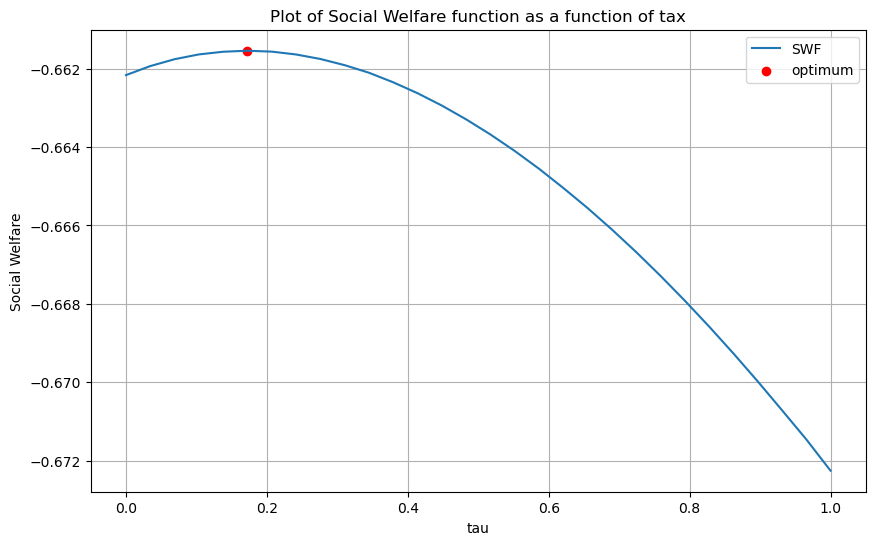

In [8]:
# 1. Create an array of t values from 0 to 1
tau_values = np.linspace(0, 1, 30)  

# 2. Compute the y values using the SWF_equilibrium function
swf_values = [government.SWF_equilibrium(x) for x in tau_values]

# 3. Plot the function
plt.figure(figsize=(10, 6))
plt.plot(tau_values, swf_values, label='SWF')
plt.scatter(t_best, swf_best, label = "optimum", color="r")
plt.xlabel('tau')
plt.ylabel('Social Welfare')
plt.title('Plot of Social Welfare function as a function of tax')
plt.legend()
plt.grid(True)
plt.show()

Our calculated optimum does indeed coincide with the maximum of the social welfare function.

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [9]:
from exercise2 import *

par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


We set a seed for consistent results. We draw from a normal distribution with the given standard deviation. From here we calculate the average realized utility. 

In [10]:
# Set seed for replication of results
np.random.seed(101)

# Define error drawing function
def epsilon(n=par.K):
    n = n # Amount of simulations
    eps = np.random.normal(loc=0, scale = par.sigma, size = n) # normal distribution
    return eps

# Functions for mean expected utilities
def u1():
    u1 = par.v[0] + np.mean(epsilon())
    return u1

def u2():
    u2 = par.v[1] + np.mean(epsilon())
    return u2

def u3():
    u3 = par.v[2] + np.mean(epsilon())
    return u3

# Average realized utility for 10.000 draws
print(f'Average realized utility for')
print(f'J = 1: {u1():.2f}')
print(f'J = 2: {u2():.2f}')
print(f'J = 3: {u3():.2f}')

Average realized utility for
J = 1: 1.03
J = 2: 1.98
J = 3: 2.99


These results are expected when running this many simulations. From simple statistics we know that the expected utilities for each career J is simplyy $v_j$ as $\epsilon$ have expectation zero.

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We begin to calculate the fraction in each career for each person i and the mean of the subjective ex-ante utility and ex-post realized utility.

In [11]:
# Set seed for replication of results
np.random.seed(101)

# Intitializing lists to store values
count_frac_list = [] # Fractions in each career
mean_u_prior_list = [] # Mean prior for person i
mean_realized_j_list = [] # Mean realized career utility for person i
difference_list = [] # Difference between prior and realized

for i in par.F: # Looping through all persons i from 1 to 10

    results = career_simulation(i) # Run simulation with 10.000 draws for each type of person i
    j_vec, u_prior_vec, realized_j_vec = zip(*results) # Store results in vectors
    
    count = np.bincount(j_vec)[1:] # Count amount of choices in career 1, 2, 3 for person i
    count_frac = count/len(j_vec) # Fraction in each career

    mean_u_prior = np.mean(u_prior_vec) # Mean of max prior utility
    mean_realized_j = np.mean(realized_j_vec) # Mean of realized career path
    difference = mean_u_prior - mean_realized_j # Difference in utility

    # Appending statistics for each person i
    count_frac_list.append(count_frac)
    mean_u_prior_list.append(mean_u_prior)
    mean_realized_j_list.append(mean_realized_j)
    difference_list.append(difference)

# Storing values in dataframe to illustrate as a table
df = pd.DataFrame({
    'Person': range(1, 11),
    'Mean_u_prior': mean_u_prior_list,
    'Mean_realized_j': mean_realized_j_list,
    'Difference': difference_list
})

In [12]:
df = df.round(2) # rounding to 2 decimals
print(df.to_string(index=False)) # Excluding index

 Person  Mean_u_prior  Mean_realized_j  Difference
      1          3.92             2.41        1.51
      2          3.47             2.52        0.95
      3          3.30             2.59        0.71
      4          3.22             2.67        0.55
      5          3.16             2.74        0.42
      6          3.13             2.80        0.33
      7          3.11             2.78        0.33
      8          3.10             2.82        0.28
      9          3.08             2.81        0.27
     10          3.06             2.83        0.23


We see that there is a large differencce in realized and prior utility for persons $F_i = 1$. The difference between prior and realized decreases as the amount of friends increases. The law of averages plays out and with more information they are able to choose the more optimal career.

Below we plot the shares in each career path for $F_i \in {1, 2, ..., 10}$

In [13]:
# Plotting fractions
def plot_count_frac(i):
    X = [1, 2, 3]
    fig, ax = plt.subplots(figsize=(8, 6)) 
    bars = ax.bar(X, count_frac_list[i-1]*100, color=['blue', 'r', 'green'])
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge')

    plt.xlabel('Career path j')
    plt.ylabel('Fraction')
    plt.title('Share of person i in each career path')
    plt.xticks(list(X))
    plt.ylim(0, 100)
    plt.show()

interact(plot_count_frac, i=widgets.IntSlider(min=1, max=10, step=1, value=1,
                                               description = "Person i"))

interactive(children=(IntSlider(value=1, description='Person i', max=10, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_count_frac(i)>

We see that as the amount of friends increase, then the fraction in career path 3 increase. With $F_i = 8, 9, 10$ then the fraction in career 1 is around 1%.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
They can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

We repeat the same approach as in Q2. We call the function career_simulation_new() which simply adds the ability to observe their chosen career utility and switch with cost $c = 1$. 

In [14]:
# Set same seed to replicate results in Q2
np.random.seed(101)

# As in Q2, initializing lists to store values
mean_u_prior_list_new = []
mean_realized_j_list_new = []
count_frac_list_new = []

# Storing initial choices
mean_u_prior_list_old = []
mean_realized_j_list_old = []


for i in par.F: # Simulation for persons i = 1 to i = 10

    # Calling new simulation function, with learning and switching
    results = career_simulation_new(i)
    j_vec_old, j_vec_new, u_prior_vec_old, u_prior_vec_new, realized_j_vec_old, realized_j_vec_new = zip(*results)
    
    # Dataframe with previous and new career
    df_j = pd.DataFrame({
        'old': j_vec_old,
        'new': j_vec_new
    })

    # Subsetting dataframes based on initial career choice
    df_1 = df_j[df_j['old']==1]
    df_2 = df_j[df_j['old']==2]
    df_3 = df_j[df_j['old']==3]

    # Calculating fraction in each career based on initial career choice
    count_new_1 = np.bincount(df_1["new"])[1:] # Counts instances of 1s, 2s and 3s where j_old == 1
    count_frac_new_1 = count_new_1/len(df_1) # Calculates fractions in each career choice period 2
    count_new_2 = np.bincount(df_2["new"])[1:]
    count_frac_new_2 = count_new_2/len(df_2)
    count_new_3 = np.bincount(df_3["new"])[1:]
    count_frac_new_3 = count_new_3/len(df_3)

    # Calculates means from initial choices
    mean_realized_j_old = np.mean(realized_j_vec_old)
    mean_u_prior_old = np.mean(u_prior_vec_old)

    # Calcuates mean prior and realized utility after learning and switching
    mean_u_prior_new = np.mean(u_prior_vec_new)
    mean_realized_j_new = np.mean(realized_j_vec_new)

    # Appends results
    count_frac_list_new.append((count_frac_new_1, count_frac_new_2, count_frac_new_3))
    mean_u_prior_list_new.append(mean_u_prior_new)
    mean_realized_j_list_new.append(mean_realized_j_new)
    mean_realized_j_list_old.append(mean_realized_j_old)
    mean_u_prior_list_old.append(mean_u_prior_old)

# Calculating mean difference between initial realized j and ex-post j after potential of switching
difference_list_new = []
for i in range(len(mean_realized_j_list_new)):
    difference_list_new.append(mean_realized_j_list_new[i]-mean_realized_j_list_old[i])

We create a dataframe to illustrate our results in a table.

In [15]:
df_new = pd.DataFrame({
    'Person': range(1, 11),
    'Mean_u_prior': mean_u_prior_list_old,
    'New_mean_u_prior': mean_u_prior_list_new,
    'Mean_realized_j': mean_realized_j_list_old,
    'New_mean_realized_j': mean_realized_j_list_new,
    'Change in realized utility': difference_list_new 
})

df_new = df_new.round(2)
print(df_new.to_string(index=False))

 Person  Mean_u_prior  New_mean_u_prior  Mean_realized_j  New_mean_realized_j  Change in realized utility
      1          3.92              2.89             2.41                 2.68                        0.27
      2          3.47              2.89             2.52                 2.84                        0.31
      3          3.30              2.92             2.59                 2.89                        0.30
      4          3.22              2.97             2.67                 2.93                        0.25
      5          3.16              3.01             2.74                 2.98                        0.24
      6          3.13              3.05             2.80                 3.03                        0.23
      7          3.11              3.03             2.78                 3.03                        0.25
      8          3.10              3.05             2.82                 3.03                        0.21
      9          3.08              3.05       

We see that on average all types i experience an increase in realized utility with the ability to switch. Those with less initial information gain slightly more. We see a large difference in mean subjective utility intially, but this difference dissapears for those with more information. This is likely because the majority of those initially choose career path J = 3. 

Below we plot the fractions who stay and who switched for each person i and eacch initial career choice.

In [16]:
# Plotting fractions
def plot_count_frac(i, j_prev):
    X = [1, 2, 3]
    fig, ax = plt.subplots(figsize=(8, 6)) 
    colors = ['blue'] * len(X)
    colors[j_prev - 1] = 'red'
    bars = ax.bar(X, count_frac_list_new[i-1][j_prev-1]*100, color=colors)
    ax.bar_label(bars, fmt='%.2f%%', label_type='edge')

    plt.xlabel('Career path')
    plt.ylabel('Fraction')
    plt.title('Share of person i in each career path\nRed bar = Stayed\nBlue bar = Switched')
    plt.xticks(list(X))
    plt.ylim(0, 100)
    plt.show()

interact(plot_count_frac, i=widgets.IntSlider(min=1, max=10, step=1, value=1, description = "person i")
         , j_prev=widgets.IntSlider(min=1, max=3, step=1, value=0, description = "initial career"))

interactive(children=(IntSlider(value=1, description='person i', max=10, min=1), IntSlider(value=1, descriptio…

<function __main__.plot_count_frac(i, j_prev)>

We see that there is a bias to stay, with staying being the most popular option, even for the initial career choice J = 1. This is due to switching costs. The distributions do not change too much between persons, however there is a tendency as $F_i$ increases that more end up towards career path 2 and 3.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [17]:
from exercise3 import *
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

We find each porint A, B, C, D, by looping through the points in X, checking the binding condition and then calculating distances and saving the lowest found distance.

In [18]:
# Objective function to measure point distance
dist = lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

# Finding A
# Initial optimal values
dist_min_A = np.inf
x1_A = np.nan
x2_A = np.nan

for x in X:
    if x[0] > y[0] and x[1] > y[1]: # Binding condition for A
        dist_now_A = dist(x) # Calculating distance
        if dist_now_A < dist_min_A: # If distance smaller than minimum, then update optimum
            dist_min_A = dist_now_A
            x1_A = x[0]
            x2_A = x[1]

# Finding B
# Initial optimal values
dist_min_B = np.inf
x1_B = np.nan
x2_B = np.nan

for x in X:
    if x[0] > y[0] and x[1] < y[1]: # Binding condition for B
        dist_now_B = dist(x) # Calculating distance
        if dist_now_B < dist_min_B: # If distance smaller than minimum, then update optimum
            dist_min_B = dist_now_B
            x1_B = x[0]
            x2_B = x[1]

# Finding C
# Initial optimal values
dist_min_C = np.inf
x1_C = np.nan
x2_C = np.nan

for x in X:
    if x[0] < y[0] and x[1] < y[1]: # Binding condition for C
        dist_now_C = dist(x) # Calculating distance
        if dist_now_C < dist_min_C: # If distance smaller than minimum, then update optimum
            dist_min_C = dist_now_C
            x1_C = x[0]
            x2_C = x[1]

# Finding D
# Initial optimal values
dist_min_D = np.inf
x1_D = np.nan
x2_D = np.nan

for x in X:
    if x[0] < y[0] and x[1] > y[1]: # Binding condition for D
        dist_now_D = dist(x) # Calculating distance
        if dist_now_D < dist_min_D: # If distance smaller than minimum, then update optimum
            dist_min_D = dist_now_D
            x1_D = x[0]
            x2_D = x[1]

In [19]:
ABC = [(x1_A, x1_B, x1_C), (x2_A, x2_B, x2_C)]
CDA = [(x1_C, x1_D, x1_A), (x2_C, x2_D, x2_A)]

Below we graph the points and the triangles ABC and CDA. 

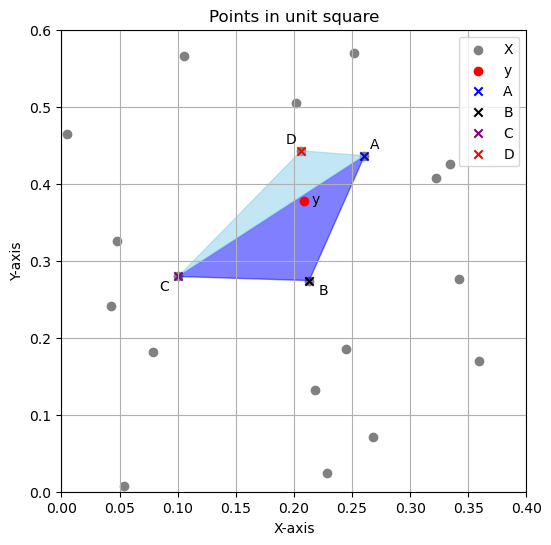

In [20]:
# Plotting points and annoatating them with text
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], color='grey', marker='o', label="X")

# Drawing triangles ABC and CDA
plt.fill(ABC[0], ABC[1], color='blue', alpha=0.5)
plt.fill(CDA[0], CDA[1], color='skyblue', alpha=0.5)

plt.scatter(y[0], y[1], color='red', marker='o', label="y")
plt.annotate('y', (y[0], y[1]), textcoords="offset points", xytext=(8,-2), ha='center')

plt.scatter(x1_A, x2_A, color='blue', marker='x', label="A")
plt.annotate('A', (x1_A, x2_A), textcoords="offset points", xytext=(7.5,5), ha='center')

plt.scatter(x1_B, x2_B, color='black', marker='x', label="B")
plt.annotate('B', (x1_B, x2_B), textcoords="offset points", xytext=(10,-10), ha='center')

plt.scatter(x1_C, x2_C, color='purple', marker='x', label="C")
plt.annotate('C', (x1_C, x2_C), textcoords="offset points", xytext=(-10,-10), ha='center')

plt.scatter(x1_D, x2_D, color='red', marker='x', label="D")
plt.annotate('D', (x1_D, x2_D), textcoords="offset points", xytext=(-7.5,5), ha='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Points in unit square')
plt.legend()
plt.xlim(0, 0.4)
plt.ylim(0, 0.6)
plt.grid(True)
plt.show()

We see that our method correctly locates the points in X closest to y. Here y falls inside the triangle ABC.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

From the graph we see that the point is located in the triangle ABC. We can calculate this numerically with the barycentric coordinates.

In [21]:
# Calculates barycentric coordinates for given triangle and point y. 

def bary(ABC, y):
    # Calculating step-wise by first calculating numerator and denominator
    num_1 = (ABC[1][1] - ABC[1][2])*(y[0] - ABC[0][2]) + (ABC[0][2] - ABC[0][1])*(y[1] - ABC[1][2]) 
    denom_1 = (ABC[1][1] - ABC[1][2])*(ABC[0][0] - ABC[0][2]) + (ABC[0][2] - ABC[0][1])*(ABC[1][0] - ABC[1][2])
    r1 = num_1/denom_1

    num_2 = (ABC[1][2] - ABC[1][0])*(y[0] - ABC[0][2]) + (ABC[0][0] - ABC[0][2])*(y[1] - ABC[1][2]) 
    denom_2 = (ABC[1][1] - ABC[1][2])*(ABC[0][0] - ABC[0][2]) + (ABC[0][2] - ABC[0][1])*(ABC[1][0] - ABC[1][2]) 
    r2 = num_2/denom_2

    r3 = 1 - r1 - r2
    return r1, r2, r3

In [22]:
r1_abc, r2_abc, r3_abc = bary(ABC, y)

print(f'r1_ABC = {r1_abc:.2f}')
print(f'r2_ABC = {r2_abc:.2f}')
print(f'r3_ABC = {r3_abc:.2f}')

r1_ABC = 0.63
r2_ABC = 0.07
r3_ABC = 0.30


We see that the conditions $r_1^{ABC}, r_2^{ABC}, r_2^{ABC} \in [0;1]^3$ is satisfied, therefore the coordinate y must be inside the triangle ABC, which is in-line with our figure.

We also calculate them for CDA.

In [23]:
r1_cda, r2_cda, r3_cda = bary(CDA, y)
print(f'r1_CDA =  {r1_cda:.2f}')
print(f'r2_CDA = {r2_cda:.2f}')
print(f'r3_CDA =  {r3_cda:.2f}')

r1_CDA =  0.37
r2_CDA = -0.13
r3_CDA =  0.77


We have $r_2^{CDA}<0$, so it does not fall within CDA as expeccted.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [24]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

We follow the algorithm for the point y. As it is within ABC we simply do steps 1 and 2.

In [25]:
# 1 Compute A, B, C, A
A = (ABC[0][0], ABC[1][0])
B = (ABC[0][1], ABC[1][1])
C = (ABC[0][2], ABC[1][2])

# y is inside the triangle ABC, so we continue to calculate step 2
# 2 return approximation given by formula

# Calculating true value and approximation
f_y_true = f(y)
f_y_approx = r1_abc*f(A) + r2_abc*f(B) + r3_abc*f(C)

print(f'True f(y)   = {f_y_true:.3f}')
print(f'Approx f(y) = {f_y_approx:.3f}')
print(f'Difference  = {f_y_approx - f_y_true:.3f}')

True f(y)   = 0.079
Approx f(y) = 0.084
Difference  = 0.005


We see that our approximation is quite good with an error of just 0.005 from the true value. 

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [26]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

We repeat the algorithm for the points in Y. We call the funcction find_ABCD, which finds the points A, B, C and D and the triangles ABC and CDA for given X and y.

In [27]:
# Initializing lists to store function values
f_Y_true = []
f_Y_approx = []

# Looping through points in Y and repating algorithm
for y in Y:
    f_Y_true.append(f(y))

    # Creating triangles ABC and CDA if possible
    ABC, CDA = find_ABCD(X, y)
    R1_abc, R2_abc, R3_abc = bary(ABC, y)
    R1_cda, R2_cda, R3_cda = bary(CDA, y)

    # Check to see whether conditions are satisfied
    added = False

    if 0<=R1_abc<=1 and 0<=R2_abc<=1 and 0<=R3_abc<=1:
        A = (ABC[0][0], ABC[1][0])
        B = (ABC[0][1], ABC[1][1])
        C = (ABC[0][2], ABC[1][2])
        f_Y_approx.append(R1_abc*f(A) + R2_abc*f(B) + R3_abc*f(C))
        added = True

    if 0<=R1_cda<=1 and 0<=R2_cda<=1 and 0<=R3_cda<=1:
        C = (CDA[0][0], CDA[1][0])
        D = (CDA[0][1], CDA[1][1])
        A = (CDA[0][2], CDA[1][2])
        f_Y_approx.append(R1_cda*f(C) + R2_cda*f(D) + R3_abc*f(A))
        added = True

    if added == False:
        f_Y_approx.append(np.nan)
    
df_f_Y = pd.DataFrame({
    'Y_points': Y,
    'true_f(y)': f_Y_true,
    'f(y)_approx': f_Y_approx
})

df_f_Y = df_f_Y.round(3)
print(df_f_Y.to_string(index=False))

  Y_points  true_f(y)  f(y)_approx
(0.2, 0.2)       0.04        0.040
(0.8, 0.2)       0.16        0.159
(0.8, 0.8)       0.64          NaN
(0.8, 0.2)       0.16        0.159
(0.5, 0.5)       0.25        0.251


We see that our algorithm is quite good at approximating the function values up to around 3 decimals. For one point, (0.8, 0.8), we were not able to calculate an approximation because the conditions were violated.

Below we illustrate graphically why this value is NaN. We call the function find_nan() which calculates all the points and coordinates the algorithm for a given point. Specifically we look at Y[2]. 

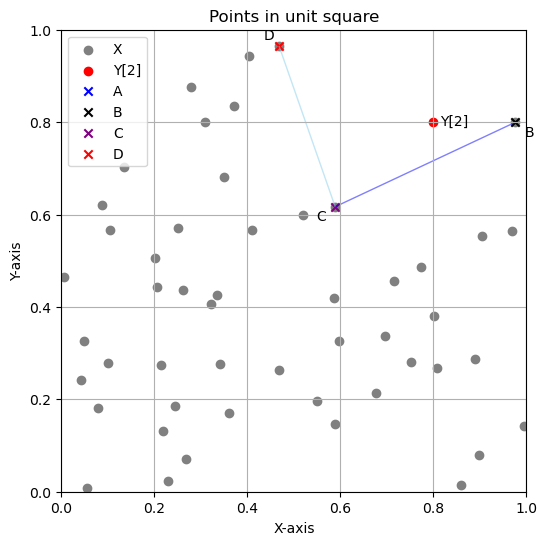

In [28]:
# Plotting why there's NAN in Y[2]
x1_A, x2_A, x1_B, x2_B, x1_C, x2_C, x1_D, x2_D, ABC, CDA = find_nan(X, Y[2])

# We call plt_nan to replicate plot from Q1
plt_nan(X, Y, x1_A, x2_A, x1_B, x2_B, x1_C, x2_C, x1_D, x2_D, ABC, CDA)

The plot shows that at the point (0.8, 0.8) there is no point A in X, which is above to the right of it. The algorithm therefore fails, because it cannot calculate A, and so it cannot calculate ABC or CDA. It would however be possible to calculate the algorithm if we instead looked at the triangle CBD, which the point falls within. But that's not asked for, sorry.